In [26]:
# Imports 
import pandas as pd
from sklearn import tree 
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score


In [2]:
# Load dataset
dataset = pd.read_csv("./datasets/CTG.csv")
dataset.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [4]:
dataset.value_counts('NSP')

NSP
1    1655
2     295
3     176
dtype: int64

In [33]:
dataset.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [15]:
# Get the X and y variables 
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [16]:
# Since the data is not balanced its a good idea to use stratified sampling so that every class will be represented equally
sample = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in sample.split(X, y):
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

In [17]:
# Scale the values of X to be in range 0 - 1
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [18]:
# Train the classifier 
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Make prediction on the test set
y_pred = tree_clf.predict(x_test)

In [22]:
# Measure the performance of the model
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print(f'f1-score: {f1}  |   recall: {recall}   |   precision: {precision}')


f1-score: 0.9105882352941177  |   recall: 0.9105882352941177   |   precision: 0.9105882352941177


In [23]:
# Confision matrix 
cm

array([[310,  19,   2],
       [ 12,  46,   1],
       [  2,   2,  31]], dtype=int64)

In [24]:
# Visualize our tree
tree_representation = tree.export_text(tree_clf)
print(tree_representation)


|--- feature_8 <= -0.88
|   |--- feature_9 <= 3.19
|   |   |--- feature_7 <= 0.72
|   |   |   |--- feature_9 <= 2.79
|   |   |   |   |--- feature_2 <= 0.22
|   |   |   |   |   |--- feature_12 <= 1.40
|   |   |   |   |   |   |--- feature_10 <= 0.28
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_10 >  0.28
|   |   |   |   |   |   |   |--- feature_15 <= 0.25
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_15 >  0.25
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_12 >  1.40
|   |   |   |   |   |   |--- feature_11 <= -1.35
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_11 >  -1.35
|   |   |   |   |   |   |   |--- feature_1 <= -0.55
|   |   |   |   |   |   |   |   |--- feature_19 <= -0.56
|   |   |   |   |   |   |   |   |   |--- feature_10 <= -0.18
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- feature_10 >  -0.

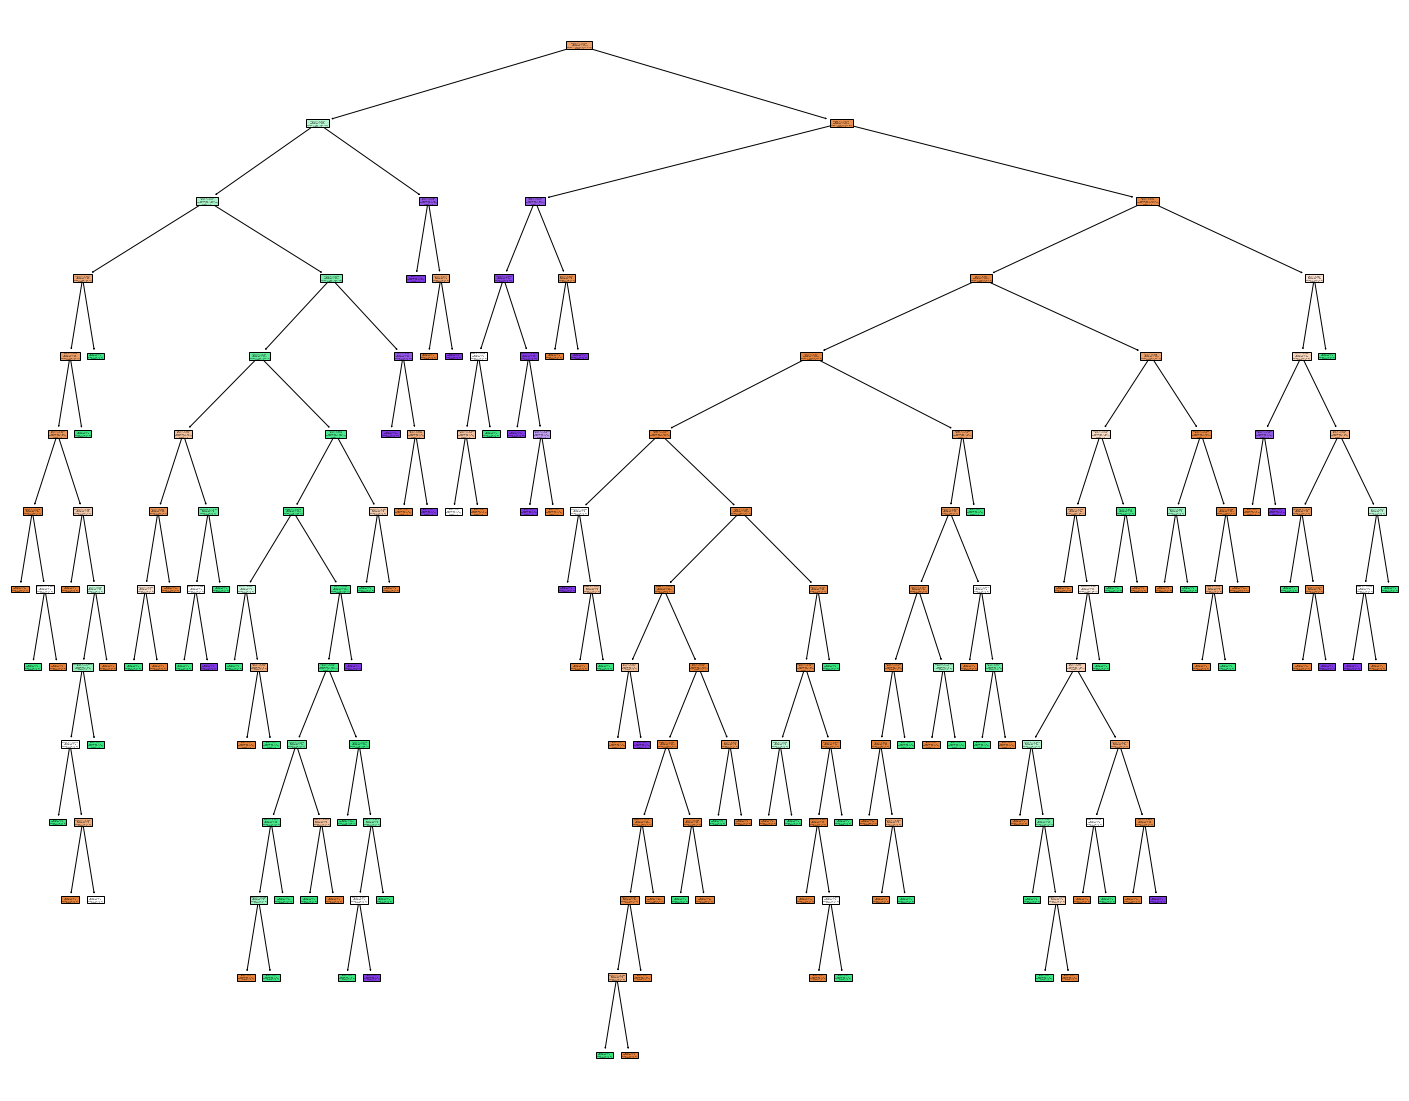

In [32]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(tree_clf,
                   feature_names=dataset.columns,
                   class_names=['1', '2', '3'],
                   filled=True)
plt.show()
fig.savefig('./images/ctg.png')
